In [1]:
import tensorflow as tf

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [1]:
import cv2

In [3]:
from tensorflow import keras

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense


# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer




# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:\\Users\\vasu0\\Desktop\\lenovo data(descktop)\\MLLL\\Projects\\dogcat_new\\PetImages\\training_set\\training_set',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('C:\\Users\\vasu0\\Desktop\\lenovo data(descktop)\\MLLL\\Projects\\dogcat_new\\PetImages\\test_set\\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
#model = classifier.fit_generator

model = classifier.fit_generator(training_set,
                         steps_per_epoch = 251,
                         epochs = 6,
                         validation_data = test_set,    
                         validation_steps = 100)

classifier.save("model.h3")
print("Saved model to disk")







Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/6
251/251 [==============================] - 22s 88ms/step - loss: 0.7822 - accuracy: 0.5510 - val_loss: 0.6071 - val_accuracy: 0.6807
Epoch 2/6
251/251 [==============================] - 19s 75ms/step - loss: 0.6053 - accuracy: 0.6710
Epoch 3/6
251/251 [==============================] - 19s 75ms/step - loss: 0.5714 - accuracy: 0.7020
Epoch 4/6
251/251 [==============================] - 19s 76ms/step - loss: 0.5650 - accuracy: 0.7142
Epoch 5/6
251/251 [==============================] - 18s 72ms/step - loss: 0.5440 - accuracy: 0.7228
Epoch 6/6
251/251 [==============================] - 18s 72ms/step - loss: 0.5337 - accuracy: 0.7390
INFO:tensorflow:Assets written to: model.h3\assets
Saved model to disk


In [6]:
import PIL.Image

In [7]:
from tensorflow import keras
model = keras.models.load_model('model.h3')

In [8]:
import matplotlib.pyplot as plt
import numpy as np 
import os 
from PIL import Image
from tensorflow.keras.preprocessing import image 

cat


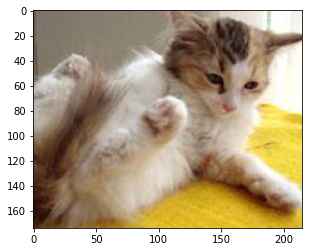

In [10]:
# Part 3 - Making new predictions

import numpy as np
from tensorflow.keras.preprocessing import image
test_image= (r"C:\Users\vasu0\Desktop\lenovo data(descktop)\MLLL\Projects\dogcat_new\PetImages\training_set\training_set\cats\cat.105.jpg")
open_image=Image.open(test_image)
test_image = image.load_img(test_image, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
    print(prediction)
    plt.imshow(open_image)
    #display(Image.open(path))
else:
    prediction = 'cat'
    print(prediction)
    plt.imshow(open_image)
    #path="c12.jpg"
    #display(Image.open(path))

In [18]:
from IPython.display import display
from PIL import Image


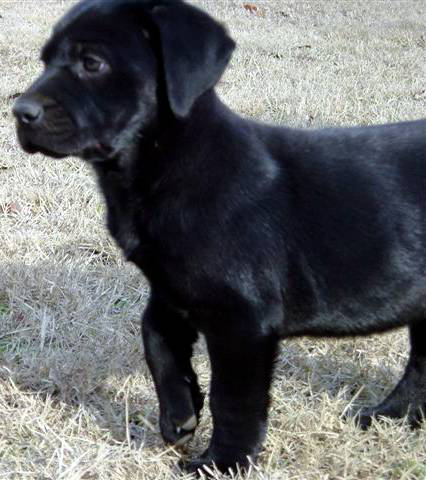

In [19]:
path="d11.jpg"
display(Image.open(path))

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image= (frame)
open_image=Image.open(test_image)
test_image = image.load_img(test_image, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
    prediction = 'dog'
    print(prediction)
    plt.imshow(open_image)
    #display(Image.open(path))
else:
    prediction = 'cat'
    print(prediction)
    plt.imshow(open_image)